<a href="https://colab.research.google.com/github/nhibb262/-ISYS574-ML-Group-Project/blob/main/Notebook/01_data_audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Data Audit: Our415 Events Dataset

**Author:** [Your Name]  
**Date:** [YYYY-MM-DD]  
**Purpose:** Understand the raw Our415 dataset before any cleaning

---

## Table of Contents
1. [Setup & Imports](#1-setup--imports)
2. [Load Raw Data](#2-load-raw-data)
3. [Basic Statistics](#3-basic-statistics)
4. [Data Types Analysis](#4-data-types-analysis)
5. [Missing Values Analysis](#5-missing-values-analysis)
6. [Categorical Columns Analysis](#6-categorical-columns-analysis)
7. [Text Columns Analysis](#7-text-columns-analysis)
8. [Duplicate Detection](#8-duplicate-detection)
9. [Key Findings & Recommendations](#9-key-findings--recommendations)

---

## Change Log
| Date | Change | Author |
|------|--------|--------|
| YYYY-MM-DD | Initial version | [Name] |

## 1. Setup & Imports

In [1]:
# Mount Google Drive (Colab only)
from google.colab import drive
drive.mount('/content/drive')

# Project paths
import os
PROJECT_PATH = '/content/drive/MyDrive/sf-events-explorer'
RAW_DATA_PATH = f'{PROJECT_PATH}/data/raw'
PROCESSED_DATA_PATH = f'{PROJECT_PATH}/data/processed'

# Create directories if they don't exist
os.makedirs(RAW_DATA_PATH, exist_ok=True)
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

Mounted at /content/drive


In [2]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Setup complete!")

Setup complete!


## 2. Load Raw Data

In [3]:
# Data source URL
DATA_URL = "https://data.sfgov.org/api/views/8i3s-ih2a/rows.csv?accessType=DOWNLOAD"

# Load directly from SF Open Data
print("Downloading data from SF Open Data...")
df_raw = pd.read_csv(DATA_URL)

# Save a local copy
raw_file_path = f'{RAW_DATA_PATH}/Our415_Events_and_Activities.csv'
df_raw.to_csv(raw_file_path, index=False)
print(f"Saved raw data to: {raw_file_path}")

# Quick look
print(f"\n{'='*50}")
print(f"Dataset loaded: {len(df_raw):,} rows x {len(df_raw.columns)} columns")
print(f"{'='*50}")

Saved raw data to: /content/drive/MyDrive/sf-events-explorer/data/raw/Our415_Events_and_Activities.csv

Dataset loaded: 1,874 rows x 30 columns


In [4]:
# Preview first few rows
df_raw.head(3)

,id,org_name,event_name,event_description,event_start_date,event_end_date,days_of_week,start_time,end_time,more_info,fee,admission_price,site_location_name,event_photo,events_category,age_group_eligibility_tags,race_ethnicity_eligibility_tags,special_needs_eligibility_tags,sogi_eligibility_tags,language_eligibility_tags,site_address,site_phone,site_email,latitude,longitude,point,analysis_neighborhood,supervisor_district,data_as_of,data_loaded_at
0,41047_rpd,SF Rec Park,Learn to Swim - Level 1,This class is designed to orient participants to the aquatic environment and to help them gain b...,2026/01/06 12:00:00 AM,2026/03/07 12:00:00 AM,TBD,00:00:00,00:00:00,sfrecpark.org/register,True,NaN,SAN FRANCISCO RECREATION & PARKS,https://upload.wikimedia.org/wikipedia/en/0/0b/San_Francisco_Recreation_%26_Parks_Department_Log...,Sports & Recreation,Children; Pre-Teens; Teens; TAY,NaN,NaN,NaN,NaN,501 Stanyan St,(415) 831-2700,NaN,37.77,-122.45,POINT (-122.454477 37.772208),Golden Gate Park,1.00,2025/12/17 12:00:00 AM,2025/12/17 07:05:14 AM
1,40671_rpd,SF Rec Park,Jr. Warriors Basketball - Herz - 5th/6thGrade,Welcome to our 25th Annual SFRPD All-City Jr. Warriors Youth Basketball League in San Francisco!...,2026/01/07 12:00:00 AM,2026/02/25 12:00:00 AM,W,17:00:00,18:00:00,sfrecpark.org/register,True,NaN,HERZ PLGD,https://upload.wikimedia.org/wikipedia/en/0/0b/San_Francisco_Recreation_%26_Parks_Department_Log...,Sports & Recreation,Pre-Teens; Teens,NaN,NaN,NaN,NaN,1700 Visitacion Ave @ Hahn St,(415) 831-2700,NaN,37.71,-122.42,POINT (-122.415401052 37.713564606),Visitacion Valley,10.00,2025/12/17 12:00:00 AM,2025/12/17 07:05:14 AM
2,41112_rpd,SF Rec Park,Learn to Swim - Level 4,This class should improve participants' proficiency in performing the swimming strokes that were...,2026/01/06 12:00:00 AM,2026/03/07 12:00:00 AM,Sa,09:00:00,09:30:00,sfrecpark.org/register,True,NaN,SAN FRANCISCO RECREATION & PARKS,https://upload.wikimedia.org/wikipedia/en/0/0b/San_Francisco_Recreation_%26_Parks_Department_Log...,Sports & Recreation,Children; Pre-Teens; Teens; TAY,NaN,NaN,NaN,NaN,501 Stanyan St,(415) 831-2700,NaN,37.77,-122.45,POINT (-122.454477 37.772208),Golden Gate Park,1.00,2025/12/17 12:00:00 AM,2025/12/17 07:05:14 AM


In [5]:
# List all columns
print("COLUMNS IN DATASET:")
print("-" * 40)
for i, col in enumerate(df_raw.columns, 1):
    print(f"{i:2}. {col}")

COLUMNS IN DATASET:
----------------------------------------
 1. id
 2. org_name
 3. event_name
 4. event_description
 5. event_start_date
 6. event_end_date
 7. days_of_week
 8. start_time
 9. end_time
10. more_info
11. fee
12. admission_price
13. site_location_name
14. event_photo
15. events_category
16. age_group_eligibility_tags
17. race_ethnicity_eligibility_tags
18. special_needs_eligibility_tags
19. sogi_eligibility_tags
20. language_eligibility_tags
21. site_address
22. site_phone
23. site_email
24. latitude
25. longitude
26. point
27. analysis_neighborhood
28. supervisor_district
29. data_as_of
30. data_loaded_at


## 3. Basic Statistics

In [6]:
# Shape and memory usage
print("DATASET OVERVIEW")
print("=" * 40)
print(f"Rows:    {df_raw.shape[0]:,}")
print(f"Columns: {df_raw.shape[1]}")
print(f"Memory:  {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET OVERVIEW
Rows:    1,874
Columns: 30
Memory:  3.75 MB


In [7]:
# Describe numeric columns
df_raw.describe()

,admission_price,latitude,longitude,supervisor_district
count,0.00,1769.00,1769.00,1769.00
mean,NaN,37.76,-122.43,6.45
std,NaN,0.03,0.03,3.17
min,NaN,37.71,-122.51,1.00
25%,NaN,37.73,-122.45,3.00
50%,NaN,37.76,-122.43,8.00
75%,NaN,37.78,-122.41,9.00
max,NaN,37.80,-122.38,11.00


## 4. Data Types Analysis

In [8]:
# Data types summary
dtype_summary = pd.DataFrame({
    'Column': df_raw.columns,
    'Data Type': df_raw.dtypes.values,
    'Non-Null Count': df_raw.notna().sum().values,
    'Null Count': df_raw.isna().sum().values,
    'Null %': (df_raw.isna().sum() / len(df_raw) * 100).round(2).values,
    'Unique Values': df_raw.nunique().values
})

dtype_summary

,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Values
0,id,object,1874,0,0.00,1874
1,org_name,object,1869,5,0.27,10
2,event_name,object,1874,0,0.00,756
3,event_description,object,1813,61,3.26,718
4,event_start_date,object,1874,0,0.00,112
5,event_end_date,object,1874,0,0.00,88
6,days_of_week,object,1026,848,45.25,30
7,start_time,object,1874,0,0.00,50
8,end_time,object,1874,0,0.00,56
9,more_info,object,1874,0,0.00,849


In [9]:
# Save dtype summary for documentation
dtype_summary.to_csv(f'{PROCESSED_DATA_PATH}/dtype_summary.csv', index=False)
print(f"Saved dtype summary to {PROCESSED_DATA_PATH}/dtype_summary.csv")

Saved dtype summary to /content/drive/MyDrive/sf-events-explorer/data/processed/dtype_summary.csv


## 5. Missing Values Analysis

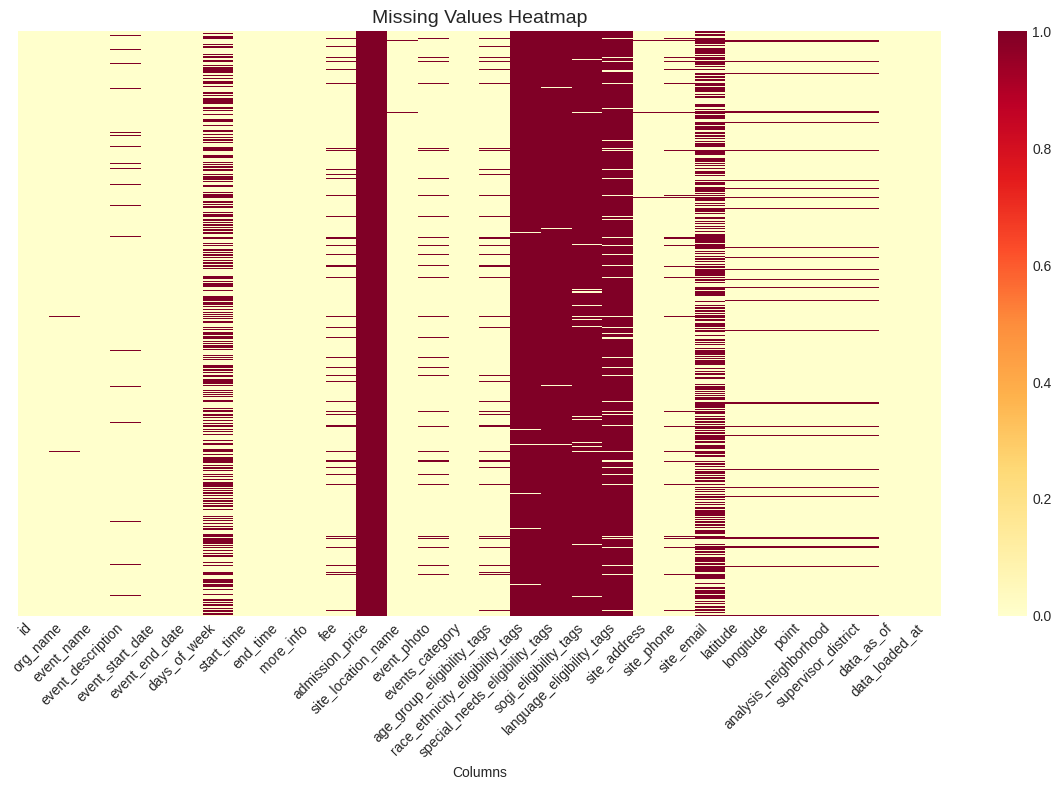

In [10]:
# Missing values heatmap
plt.figure(figsize=(12, 8))
missing_matrix = df_raw.isnull()
sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='YlOrRd')
plt.title('Missing Values Heatmap', fontsize=14)
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

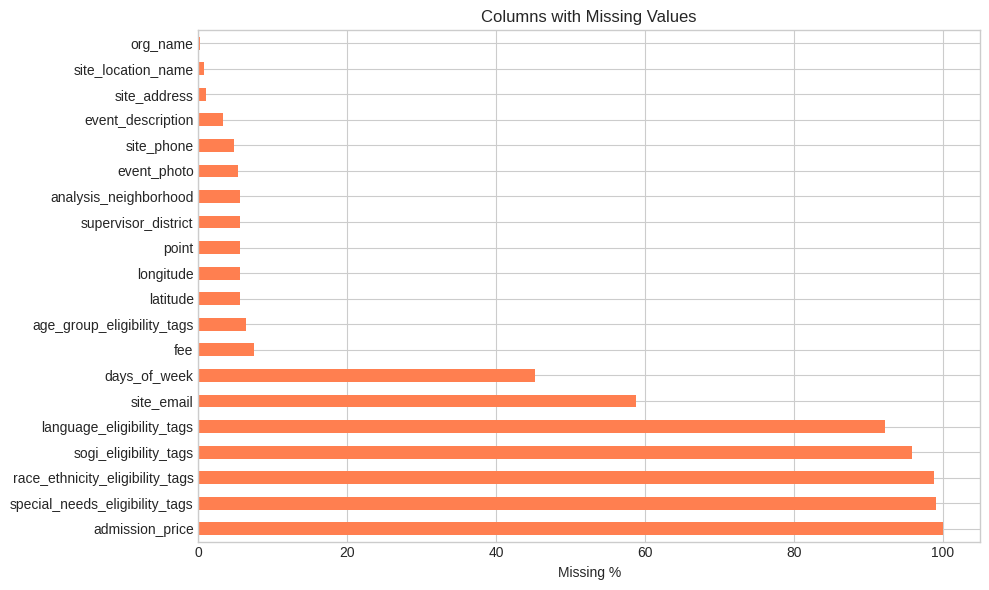

In [11]:
# Missing values bar chart
missing_pct = (df_raw.isna().sum() / len(df_raw) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]  # Only show columns with missing values

if len(missing_pct) > 0:
    plt.figure(figsize=(10, 6))
    missing_pct.plot(kind='barh', color='coral')
    plt.xlabel('Missing %')
    plt.title('Columns with Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

In [12]:
# Document columns with >50% missing (candidates for dropping)
high_missing = missing_pct[missing_pct > 50]
print("COLUMNS WITH >50% MISSING VALUES (consider dropping):")
print("-" * 50)
for col, pct in high_missing.items():
    print(f"  {col}: {pct:.1f}% missing")

COLUMNS WITH >50% MISSING VALUES (consider dropping):
--------------------------------------------------
  admission_price: 100.0% missing
  special_needs_eligibility_tags: 99.0% missing
  race_ethnicity_eligibility_tags: 98.8% missing
  sogi_eligibility_tags: 95.8% missing
  language_eligibility_tags: 92.3% missing
  site_email: 58.8% missing


## 6. Categorical Columns Analysis

In [13]:
# Identify key categorical columns
categorical_cols = ['org_name', 'events_category', 'age_group_eligibility_tags',
                   'analysis_neighborhood', 'fee', 'days_of_week']

# Check which ones exist in our data
existing_cat_cols = [col for col in categorical_cols if col in df_raw.columns]
print(f"Analyzing {len(existing_cat_cols)} categorical columns...")

Analyzing 6 categorical columns...


In [14]:
# Value counts for each categorical column
for col in existing_cat_cols:
    print(f"\n{'='*50}")
    print(f"Column: {col}")
    print(f"Unique values: {df_raw[col].nunique()}")
    print(f"-"*50)
    print(df_raw[col].value_counts().head(10))


Column: org_name
Unique values: 10
--------------------------------------------------
org_name
SF Rec Park                                       1026
SF Public Library                                  709
Family Connections Centers                          50
Gum Moon Chinatown                                  40
Instituto Familiar de la Raza                       20
APA Family Support Services                         10
Bayview YMCA Family Resource Center                  8
Compass Family Services                              4
OMI Family Resource Center                           1
Glide Family Youth and Children&#8217;s Center       1
Name: count, dtype: int64

Column: events_category
Unique values: 3
--------------------------------------------------
events_category
Sports & Recreation    1026
Library Events          709
Events for Ages 0-5     139
Name: count, dtype: int64

Column: age_group_eligibility_tags
Unique values: 43
--------------------------------------------------
age_

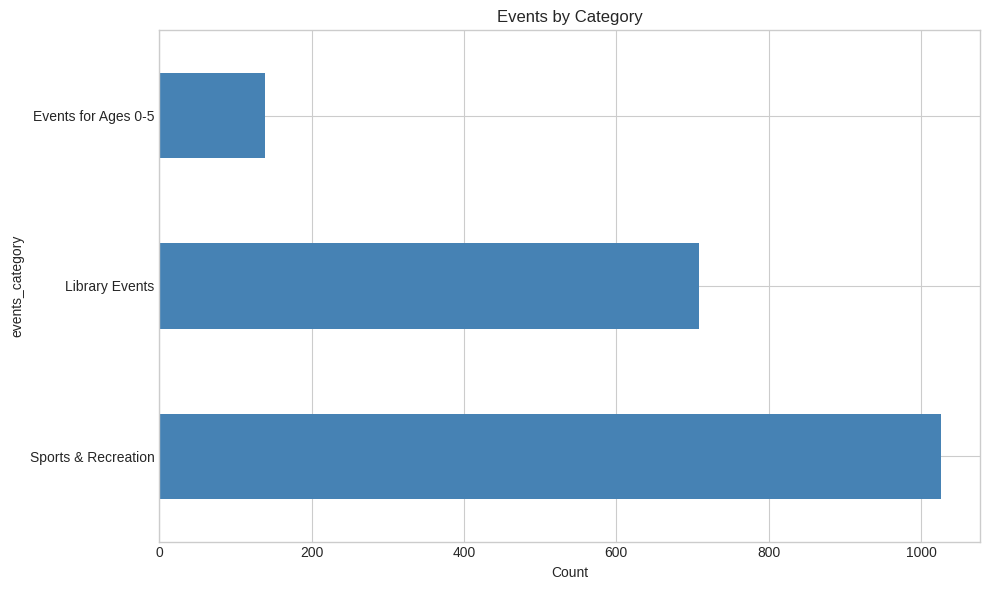

In [15]:
# Category distribution visualization
if 'events_category' in df_raw.columns:
    plt.figure(figsize=(10, 6))
    df_raw['events_category'].value_counts().plot(kind='barh', color='steelblue')
    plt.xlabel('Count')
    plt.title('Events by Category')
    plt.tight_layout()
    plt.show()

## 7. Text Columns Analysis

In [16]:
# Text column statistics
text_cols = ['event_name', 'event_description']

for col in text_cols:
    if col in df_raw.columns:
        lengths = df_raw[col].dropna().str.len()
        word_counts = df_raw[col].dropna().str.split().str.len()

        print(f"\n{'='*50}")
        print(f"Column: {col}")
        print(f"-"*50)
        print(f"Character length: min={lengths.min()}, max={lengths.max()}, mean={lengths.mean():.1f}")
        print(f"Word count: min={word_counts.min()}, max={word_counts.max()}, mean={word_counts.mean():.1f}")


Column: event_name
--------------------------------------------------
Character length: min=5, max=87, mean=29.7
Word count: min=1, max=14, mean=4.4

Column: event_description
--------------------------------------------------
Character length: min=27, max=2303, mean=353.5
Word count: min=1, max=392, mean=54.8


In [17]:
# Sample event descriptions
print("SAMPLE EVENT DESCRIPTIONS:")
print("="*70)
for i, desc in enumerate(df_raw['event_description'].dropna().head(3), 1):
    print(f"\n[{i}] {desc[:300]}..." if len(str(desc)) > 300 else f"\n[{i}] {desc}")

SAMPLE EVENT DESCRIPTIONS:

[1] This class is designed to orient participants to the aquatic environment and to help them gain basic aquatic skills. In addition, participants start learning about how to be safe around water. Children must be 48 to participate.          Registration is limited to one class per participant.

[2] Welcome to our 25th Annual SFRPD All-City Jr. Warriors Youth Basketball League in San Francisco! Our Jr. Warriors League depends on the generosity of volunteers to provide an opportunity for our youth (Kindergarten - 8th Grade) to learn the game of basketball in a recreational, supportive, and safe ...

[3] This class should improve participants' proficiency in performing the swimming strokes that were introduced in Level 3. Participants perform these strokes with increased proficiency and can swim them for greater distances. In addition, participants learn the arm actions that accompany the scissors k...


## 8. Duplicate Detection

In [18]:
# Check for exact duplicates
exact_dupes = df_raw.duplicated().sum()
print(f"Exact duplicate rows: {exact_dupes}")

Exact duplicate rows: 0


In [19]:
# Check for duplicates based on key columns
key_cols = ['event_name', 'site_location_name', 'event_start_date']
existing_key_cols = [col for col in key_cols if col in df_raw.columns]

if existing_key_cols:
    key_dupes = df_raw.duplicated(subset=existing_key_cols).sum()
    print(f"Duplicates based on {existing_key_cols}: {key_dupes}")

Duplicates based on ['event_name', 'site_location_name', 'event_start_date']: 110


In [20]:
# Check ID uniqueness
if 'id' in df_raw.columns:
    unique_ids = df_raw['id'].nunique()
    total_rows = len(df_raw)
    print(f"ID uniqueness: {unique_ids}/{total_rows} ({unique_ids/total_rows*100:.1f}%)")

    if unique_ids != total_rows:
        print("WARNING: IDs are not unique!")
        print(df_raw[df_raw.duplicated(subset=['id'], keep=False)].head())

ID uniqueness: 1874/1874 (100.0%)


## 9. Key Findings & Recommendations

### Summary Statistics
- **Total Records:** [fill in]
- **Total Columns:** [fill in]
- **Date Range:** [fill in]

### Data Quality Issues Found
1. **Missing Values:**
   - [List columns with significant missing data]
   
2. **Data Type Issues:**
   - [List any columns that need type conversion]
   
3. **Duplicates:**
   - [Describe duplicate situation]

### Recommendations for Cleaning (Notebook 02)
1. [ ] Drop columns with >X% missing values
2. [ ] Handle missing values in [columns]
3. [ ] Convert [columns] to proper data types
4. [ ] Remove [X] duplicate records
5. [ ] Standardize text in [columns]

### Key Columns for ML Model
- **Search text:** event_name, event_description
- **Filters:** events_category, age_group_eligibility_tags, fee
- **Location:** analysis_neighborhood, latitude, longitude

In [21]:
# Save audit summary
audit_summary = {
    'total_rows': len(df_raw),
    'total_columns': len(df_raw.columns),
    'exact_duplicates': exact_dupes,
    'columns_with_nulls': (df_raw.isna().sum() > 0).sum(),
    'audit_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

pd.DataFrame([audit_summary]).to_csv(f'{PROCESSED_DATA_PATH}/audit_summary.csv', index=False)
print("Audit complete! Summary saved.")

Audit complete! Summary saved.
